In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv ('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [7]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,?,?,13,3,3,0,0,0,530,530,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


In [9]:
df.shape

(101766, 50)

In [10]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [11]:
df.count()

encounter_id                101766
patient_nbr                 101766
race                        101766
gender                      101766
age                         101766
weight                      101766
admission_type_id           101766
discharge_disposition_id    101766
admission_source_id         101766
time_in_hospital            101766
payer_code                  101766
medical_specialty           101766
num_lab_procedures          101766
num_procedures              101766
num_medications             101766
number_outpatient           101766
number_emergency            101766
number_inpatient            101766
diag_1                      101766
diag_2                      101766
diag_3                      101766
number_diagnoses            101766
max_glu_serum               101766
A1Cresult                   101766
metformin                   101766
repaglinide                 101766
nateglinide                 101766
chlorpropamide              101766
glimepiride         

In [12]:
df["patient_nbr"].is_unique
#Since this number isn't unique, need to acknowledge that the data may be skewed by multiple visits by the same patients.

False

In [13]:
df["encounter_id"].is_unique

True

In [14]:
df=df.set_index("encounter_id")
#Since encounter_id is unique, I made it the index number.

In [15]:
#The next few lines of code were to get a sense of the patient demographic information and to see if there was a lot of missing data.

In [16]:
df.groupby("race").count()

,patient_nbr,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
race,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
?,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273
AfricanAmerican,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210,19210
Asian,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641
Caucasian,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099,76099
Hispanic,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037
Other,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506,1506


In [17]:
2273/ 101766
#Since only 2% of the data are in the '?' category of race, I will take out those rows to make for cleaner visualizations related to race.  

0.022335554114340742

In [18]:
df.groupby("weight").count()
#Since there are so many rows with no data ('?') will add this to the columns I drop.

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
weight,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
>200,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
?,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569,98569
[0-25),48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
[100-125),625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625
[125-150),145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145
[150-175),35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
[175-200),11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
[25-50),97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97
[50-75),897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897,897


In [19]:
76099/101766
#Caucasion makes up 3/4 of the data set.  Something to keep in mind when doing any analysis around race.

0.7477841322249081

In [20]:
df.groupby("age").count()

,patient_nbr,race,gender,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
[0-10),161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161
[10-20),691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691
[20-30),1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657
[30-40),3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775,3775
[40-50),9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685,9685
[50-60),17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256,17256
[60-70),22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483,22483
[70-80),26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068,26068
[80-90),17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197,17197


In [21]:
df.groupby("gender").count()

,patient_nbr,race,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708
Male,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055
Unknown/Invalid,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [22]:
#define values
values = ["Female", "Male"]

#drop rows that contain any value in the list
df = df[df.gender.isin(values) == True]

In [23]:
df.groupby("gender").count()

,patient_nbr,race,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708,54708
Male,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055,47055


In [24]:
missing_values=['?']
df=df.replace(missing_values,np.NaN)
df


,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO


In [25]:
drop_cols=['max_glu_serum',	'A1Cresult',	'metformin',	'repaglinide',	'nateglinide',	'chlorpropamide',	'glimepiride',	'acetohexamide',	'glipizide',	'glyburide',	'tolbutamide',	'pioglitazone',	'rosiglitazone',	'acarbose',	'miglitol',	'troglitazone',	'tolazamide',	'examide',	'citoglipton',	'insulin',	'glyburide-metformin',	'glipizide-metformin',	'glimepiride-pioglitazone',	'metformin-rosiglitazone',	'metformin-pioglitazone', 'weight',"medical_specialty", "num_lab_procedures", "diag_1", "diag_2", "diag_3", "number_diagnoses"]

In [26]:
df.drop(drop_cols, inplace = True, axis=1)

In [27]:
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,0,1,0,0,0,No,No,NO
149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,0,18,0,0,0,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,5,13,2,0,1,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,1,16,0,0,0,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,0,8,0,0,0,Ch,Yes,NO


In [28]:
df.count()

patient_nbr                 101763
race                         99492
gender                      101763
age                         101763
admission_type_id           101763
discharge_disposition_id    101763
admission_source_id         101763
time_in_hospital            101763
payer_code                   61508
num_procedures              101763
num_medications             101763
number_outpatient           101763
number_emergency            101763
number_inpatient            101763
change                      101763
diabetesMed                 101763
readmitted                  101763
dtype: int64

In [29]:
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,0,1,0,0,0,No,No,NO
149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,0,18,0,0,0,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,5,13,2,0,1,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,1,16,0,0,0,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,0,8,0,0,0,Ch,Yes,NO


In [30]:
df.rename(columns={'time_in_hospital': 'Time_in_Hospital', 'race': 'Race', 'age': 'Age', 'gender': 'Gender'}, inplace=True)

In [31]:
df.head()

,patient_nbr,Race,Gender,Age,admission_type_id,discharge_disposition_id,admission_source_id,Time_in_Hospital,payer_code,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,0,1,0,0,0,No,No,NO
149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,0,18,0,0,0,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,5,13,2,0,1,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,1,16,0,0,0,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,0,8,0,0,0,Ch,Yes,NO


**Research question:  Is there any difference between different demographic groups and how long they stay in the hospital?**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6cf6ec990>]],
      dtype=object)

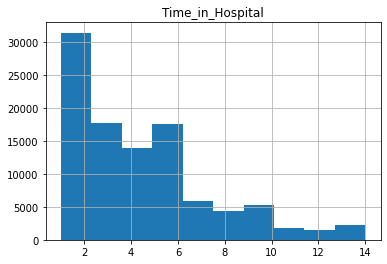

In [32]:
df.hist("Time_in_Hospital")

In [33]:
#I first check what the mean time spent in the hospital is for each demographic group.

In [34]:
df.groupby(["Race"])["Time_in_Hospital"].mean()

Race
AfricanAmerican    4.507860
Asian              3.995320
Caucasian          4.385721
Hispanic           4.059892
Other              4.275748
Name: Time_in_Hospital, dtype: float64

In [35]:
df.groupby(["Gender"])["Time_in_Hospital"].mean()

Gender
Female    4.478797
Male      4.299777
Name: Time_in_Hospital, dtype: float64

In [36]:
df.groupby(["Age"])["Time_in_Hospital"].mean()

Age
[0-10)      2.546584
[10-20)     3.191027
[20-30)     3.564876
[30-40)     3.799735
[40-50)     4.039649
[50-60)     4.125753
[60-70)     4.382395
[70-80)     4.590885
[80-90)     4.808629
[90-100)    4.755818
Name: Time_in_Hospital, dtype: float64

In [37]:
#Since  I have the means, I used a boxplot to see if I could see if there was any additional insight I could see about each group.

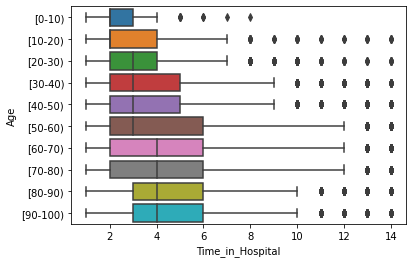

In [38]:
sns.boxplot(y="Age", x="Time_in_Hospital", data=df)

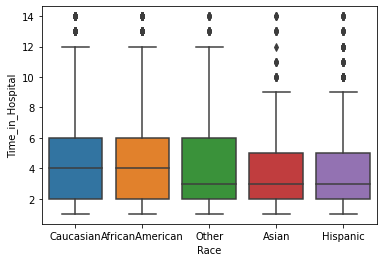

In [39]:
sns.boxplot(x="Race", y="Time_in_Hospital", data=df)

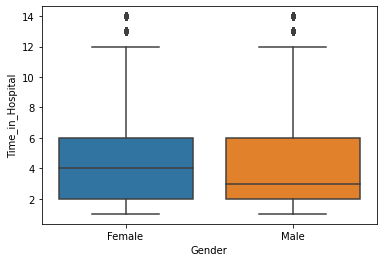

In [40]:
sns.boxplot(x="Gender", y="Time_in_Hospital", data=df)

In [41]:
#I added in the hues to see if disaggregating the data offered any other insight.

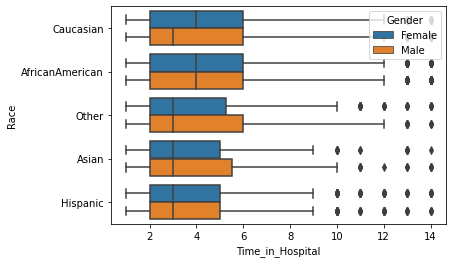

In [47]:
sns.boxplot(y="Race", x="Time_in_Hospital", data=df, hue="Gender")
plt.legend(loc='upper right', title='Gender')

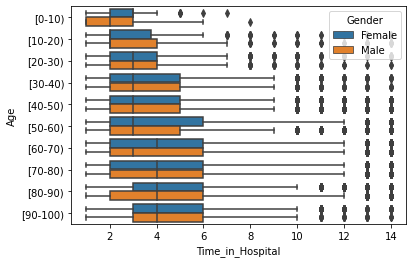

In [52]:
sns.boxplot(y="Age", x="Time_in_Hospital", data=df, hue="Gender")
plt.legend(loc='upper right', title='Gender')

A review of patient demographics showed that the mean time spent in the hospital increases slighlty the older the patients are.  The mean between gender and races was very similar.  The boxplots didn't show any extreme differences when looking at 2 demographic groups together. 